In [44]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data=pd.read_csv('tested.csv')
data.describe()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
data=data.drop_duplicates()
data['Sex']=data['Sex'].replace({'male':0,'female':1})
data['Embarked']=data['Embarked'].replace({'Q':0,'S':1,'C':2})
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Fare']=data['Fare'].fillna(data['Fare'].mean())
data['Name']=data['Name'].astype('str')
data.describe()
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object


In [52]:
def title(name):
    if 'Mrs' in name:
        return 0
    elif 'Miss' in name:
        return 1
    else:
        return 2
data['Name']=data['Name'].apply(title)
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

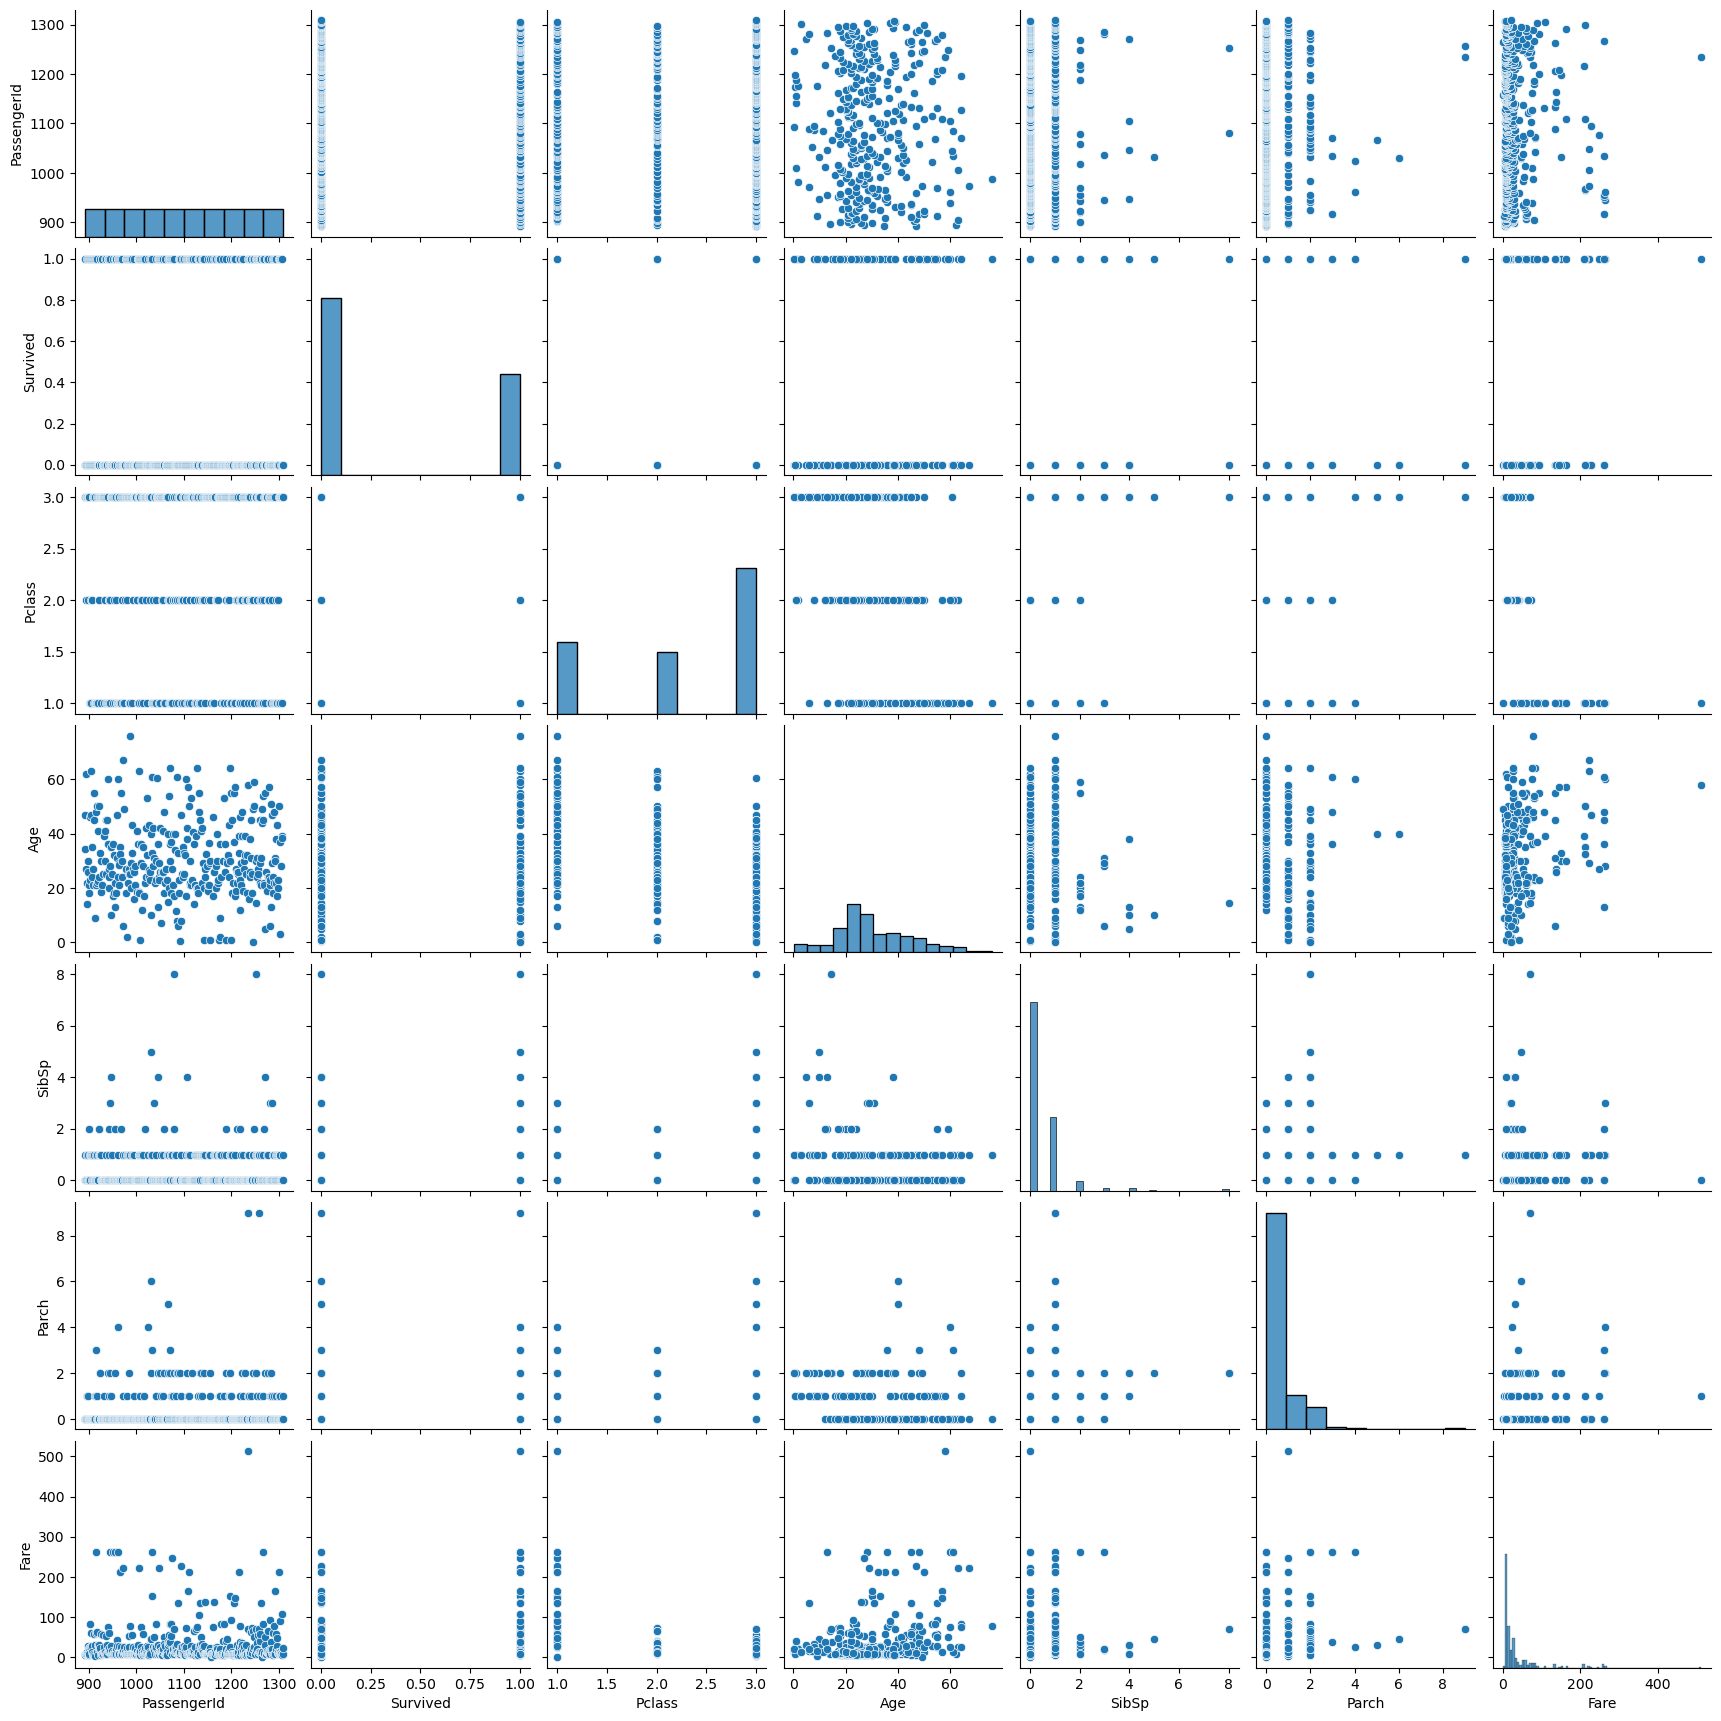

In [11]:
import seaborn as sns
sns.pairplot(data)

In [53]:
x=data.drop(columns=['Survived','Ticket','Cabin'])
y=data['Survived']

In [55]:

#building model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

xt,xtest,yt,ytest=train_test_split(x,y,test_size=0.2)
model=LogisticRegression(max_iter=1000)
model.fit(xt,yt)
prediction=model.predict(xtest)
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(prediction,ytest)
print(accuracy)

1.0
